In [1]:
import pandas as pd

In [28]:
train = pd.read_csv(r'./train.csv')
test = pd.read_csv(r'./test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#乘客名字对于生存与否没有影响，票号每个人都不一样并且没有辅助资料显示之间的关系所以无法体现生还的因果去掉，船舱信息确实太多去掉
train.drop(['PassengerId','Cabin','Name','Ticket'], inplace=True,axis=1)

In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
#用平局年龄填补缺失年龄
train['Age']  = train['Age'].fillna(train['Age'].mean())

In [10]:
#删掉没有港口信息的行
train = train.dropna()

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [12]:
#把其他乱八七八糟的东西转换从float类型 下同
train.loc[:,'Embarked'] = train.loc[:,'Embarked'].apply(lambda x : train.loc[:,'Embarked'].unique().tolist().index(x))

C:\Users\WuZL\.conda\envs\python36\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [13]:
train.loc[:,'Sex'] = train.loc[:,'Sex'].apply(lambda x : train.loc[:,'Sex'].unique().tolist().index(x))

In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [15]:
X_train = train.iloc[:,train.columns != 'Survived']
y_train = train.iloc[:,train.columns == 'Survived']

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [23]:
X_train = X_train.values.tolist()
y_train = y_train.values.tolist()

In [31]:
test.drop(['PassengerId','Cabin','Name','Ticket'], inplace=True,axis=1)
test['Age']  = test['Age'].fillna(test['Age'].mean())
test = test.dropna()
test.loc[:,'Embarked'] = test.loc[:,'Embarked'].apply(lambda x : test.loc[:,'Embarked'].unique().tolist().index(x))
test.loc[:,'Sex'] = test.loc[:,'Sex'].apply(lambda x : test.loc[:,'Sex'].unique().tolist().index(x))
X_test = test.iloc[:,test.columns != 'Survived']
y_test = test.iloc[:,test.columns == 'Survived']
X_test = X_test.values.tolist()
y_test = y_test.values.tolist()

C:\Users\WuZL\.conda\envs\python36\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [44]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [47]:
classes = [ "罹难", "幸存"]

In [48]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
sklearn_score_train = clf.score(X_train,y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test,y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(y_test, y_test_pred, target_names=classes))

C:\Users\WuZL\.conda\envs\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Sklearn's score on training data : 0.7862767154105736
Sklearn's score on testing data : 1.0
Classification report for testing data :-
              precision    recall  f1-score   support

          幸存       1.00      1.00      1.00       265
          罹难       1.00      1.00      1.00       152

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417



In [49]:
cm = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

C:\Users\WuZL\.conda\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WuZL\.conda\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WuZL\.conda\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WuZL\.conda\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38590 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WuZL\.conda\envs\python36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24184 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\WuZL\.conda\envs\python36\lib\site-packages\matplotlib\backends\back

Text(0.5, 15.0, 'Predicted label')

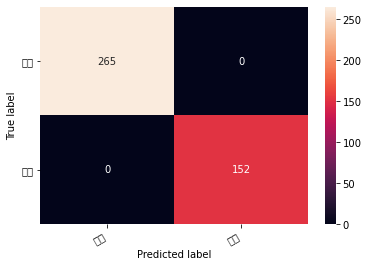

In [50]:
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')